## Simple mnist from Chapter 2 of Chollet  

With some stuff added by Rob.

In [1]:
##################################################
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
##################################################
## look at data
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

## check basic dimensions
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_labels)
print(test_labels)

ntr = len(train_labels)
nte = len(test_labels)
print(f'the number of train and test are: {ntr}, {nte}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
the number of train and test are: 60000, 10000


In [3]:
## check the digit counts
print(pd.Series(train_labels).value_counts()/ntr)
print(pd.Series(test_labels).value_counts()/nte)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: count, dtype: float64
1    0.1135
2    0.1032
7    0.1028
3    0.1010
9    0.1009
4    0.0982
0    0.0980
8    0.0974
6    0.0958
5    0.0892
Name: count, dtype: float64


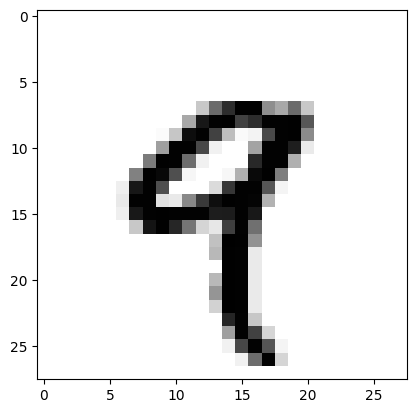

In [4]:
## plot the 4th digit in the train data
digit = train_images[4]
plt.imshow(digit,cmap = plt.cm.binary)

In [5]:
## check the pixels are in [0,255]
print(train_images.min())
print(train_images.max())

0
255


In [6]:
##################################################
## preparing the image data

## change the 28 by 28 images to a 28^2 vector
## change the type to double

train_images = train_images.reshape((ntr,28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((nte,28*28))
test_images = test_images.astype("float32")/255

In [7]:
##################################################
## model

model = keras.Sequential([
   layers.Dense(512,activation="relu"),
   #layers.Dense(512,activation="relu",kernel_regularizer=regularizers.l1(0.1)),
   layers.Dense(10,activation="softmax")
])


In [8]:
##################################################
## compilaton step

model.compile(optimizer = "rmsprop",
   loss = "sparse_categorical_crossentropy",
   metrics = ["accuracy"])

In [9]:
##################################################
## fit

nhist = model.fit(train_images,train_labels, epochs = 10, batch_size = 128, validation_data = (test_images,test_labels))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8740 - loss: 0.4287 - val_accuracy: 0.9606 - val_loss: 0.1318
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9657 - loss: 0.1146 - val_accuracy: 0.9740 - val_loss: 0.0848
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9785 - loss: 0.0717 - val_accuracy: 0.9770 - val_loss: 0.0770
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9779 - val_loss: 0.0716
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.9801 - val_loss: 0.0630
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9927 - loss: 0.0266 - val_accuracy: 0.9788 - val_loss: 0.0711
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9938 - loss: 0.0230 - val_accuracy: 0.9802 - val_loss: 0.0636
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9961 - loss: 0.0155 - val_accu

In [10]:
##################################################
## predictions
## just do first 10

test_digits = test_images[0:10]
predictions = model.predict(test_digits)

# for each test image you get a probability vector
print(type(predictions))
print(predictions.shape)
print(predictions.dtype)

## should sum to 1
print(predictions.sum(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
<class 'numpy.ndarray'>
(10, 10)
float32
[1.         0.99999994 1.         0.99999994 0.99999994 0.99999994
 0.9999999  1.0000001  1.         1.        ]


In [11]:
#  get predictions from biggest probability
ypred = predictions.argmax(axis=1)
print(ypred[:2])
print(predictions[:2])

[7 2]
[[2.9927512e-11 1.2473622e-11 5.8623346e-09 2.9447915e-07 1.7770882e-14
  2.4283412e-12 2.3309925e-15 9.9999970e-01 1.1810013e-11 5.8658493e-08]
 [3.7176550e-11 1.4711712e-07 9.9999970e-01 7.7161786e-08 6.4254966e-17
  1.4121517e-09 2.5172477e-11 4.9320357e-16 4.0443670e-08 1.2140632e-16]]


In [12]:
##################################################
## Evaluating the model on new data

test_loss , test_acc = model.evaluate(test_images, test_labels)
print(f'test acc: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9778 - loss: 0.0789
test acc: 0.9814000129699707


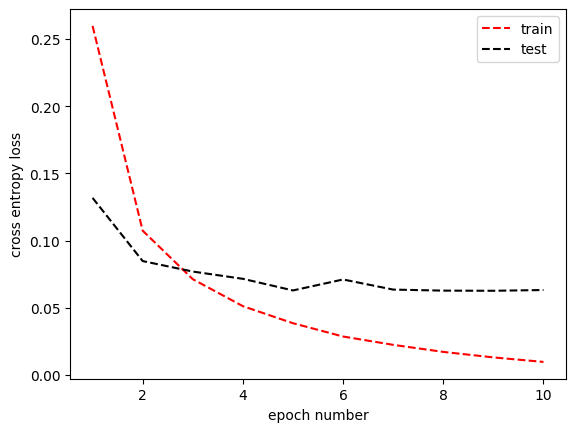

In [13]:
##################################################
### plot fitting by SGD
trL = nhist.history['loss'] # loss on train
teL = nhist.history['val_loss'] # loss on val

epind = range(1,len(teL)+1)
plt.plot(epind,trL,"r--")
#plt.plot(epind,teL,"b--")
plt.plot(epind,teL,color='black', linestyle='dashed')
plt.xlabel("epoch number"); plt.ylabel("cross entropy loss")
plt.legend(['train','test'])

In [14]:
##################################################
### predictions on all test data
ppred = model.predict(test_images)
ypred = ppred.argmax(axis=1)

##crosstab
ctab = pd.crosstab(pd.Series(ypred),pd.Series(test_labels))
print(ctab)

print("the accuracy is: ",accuracy_score(ypred,test_labels))
print(confusion_matrix(ypred,test_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
col_0    0     1     2    3    4    5    6     7    8    9
row_0                                                     
0      970     0     2    0    1    2    2     0    1    1
1        0  1126     0    0    0    0    2     5    1    2
2        1     3  1011    3    2    0    1     8    4    0
3        0     1     1  994    1    9    1     3    6    3
4        1     0     4    0  969    1    3     1    6   10
5        0     1     0    2    0  868    6     0    2    1
6        3     2     2    0    3    4  943     0    3    1
7        1     1     8    2    1    1    0  1005    5    4
8        3     1     4    2    0    4    0     2  942    1
9        1     0     0    7    5    3    0     4    4  986
the accuracy is:  0.9814
[[ 970    0    2    0    1    2    2    0    1    1]
 [   0 1126    0    0    0    0    2    5    1    2]
 [   1    3 1011    3    2    0    1    8    4    0]
 [   0    1    1  994    1    9    1    3    6    3]
 [   1    0   